# Graphical Models: Similarity Distribution Experimentation

In [31]:
# Import necessary libraries
from sde import *
import matplotlib.pyplot as plt
import collections

In [21]:
%load_ext jupyternotify

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [22]:
%%notify
import time
time.sleep(10)
print('Finished!')

%autonotify -a 30

Finished!


<IPython.core.display.Javascript object>

# Tests - Graph Size and Clique Num

Graph with 10 cliques

In [23]:
cliqNums = [10, 20, 40, 50, 60, 70, 80, 90, 100]
cliqTest = {}
graph_size = []
for n in cliqNums:
    dg = makeDirectedGraph(n*2, n*4)
    num = len(clique.clique_removal(dg)[1])
    graph_size.append((n*2, n*4))
    cliqTest[n] = num
    

No handles with labels found to put in legend.


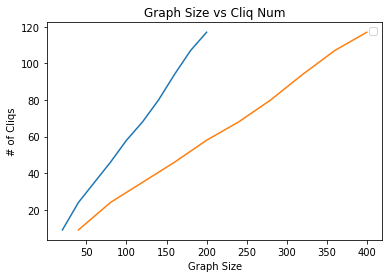

In [24]:
plt.plot(graph_size, list(cliqTest.values()))

plt.xlabel('Graph Size')
plt.ylabel('# of Cliqs')
plt.title('Graph Size vs Cliq Num')
plt.legend()

plt.show()

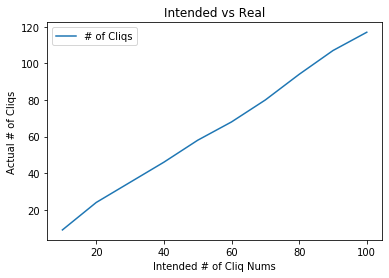

In [25]:
plt.plot(cliqNums, list(cliqTest.values()), label='# of Cliqs')

plt.xlabel('Intended # of Cliq Nums')
plt.ylabel('Actual # of Cliqs')
plt.title('Intended vs Real')
plt.legend()

plt.show()

In [26]:
for c in cliqNums:
    i = cliqNums.index(c)
    test_num = list(cliqTest.values())[i]
    print(test_num/c)

0.9
1.2
1.15
1.16
1.1333333333333333
1.1428571428571428
1.175
1.1888888888888889
1.17


In [27]:
def dgWithCliqs(num_cliq):   
    #create DAG
    dg = makeDirectedGraph(num_cliq*2, num_cliq*4)
    
    #count num of cliques in graph
    cliq_rem = clique.clique_removal(dg)
    cliqCount = len(cliq_rem[1])   
    
    # remake graph if it doesn't match the input
    if (cliqCount == num_cliq):
        return dg
    else:
        return dgWithCliqs(num_cliq)

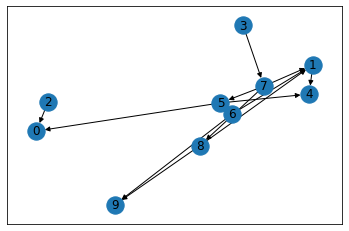

In [28]:
dg10 = dgWithCliqs(5)
nx.draw_networkx(dg10)

# Experiment

In [62]:
cliqNums = [5, 10, 15, 20]

imm_sims, full_sims, jaccard_index = {}, {}, {}

for c in cliqNums:
    immSims, fullSims, jindices  = [], [], []
    for i in range(10):
        gm = dgWithCliqs(c)
        node_list = list(gm.nodes)
        node_pairs = list(it.combinations(node_list, 2))

        #immediate similarity
        for pair in node_pairs:
            immSims.append(get_immediate_similarity(gm, pair[0], pair[1]))

        #full similarity
        for pair in node_pairs:
            fullSims.append(get_full_similarity(gm, pair[0], pair[1]))
        
        #jaccard similarity
        for pair in node_pairs:
            jindices.append(calculate_jaccard_similarity(gm, pair[0], pair[1]))
        
        
    imm_sims[c] = immSims
    full_sims[c] = fullSims
    jaccard_index[c] =jindices

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Edit distance - Immediate Similarity

In [ ]:
"""immSim_df = pd.DataFrame({ key:pd.Series(value) for key, value in immSims.items() })
immSim_df"""

([<matplotlib.axis.XTick at 0x28c92b93e88>,
 <a list of 4 Text xticklabel objects>)

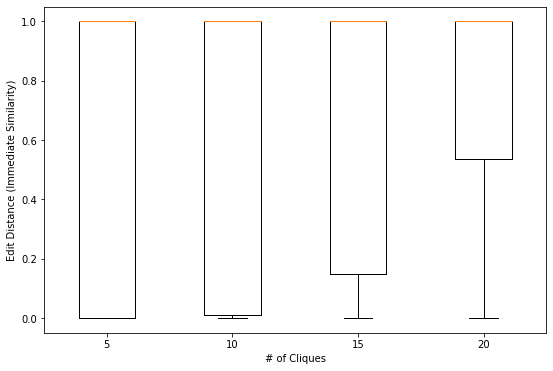

In [65]:
# box plot to compare imm sim vals against num of cliques
fig2 = plt.figure(1, figsize=(9, 6))

imm_sims = collections.OrderedDict(sorted(imm_sims.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(imm_sims.values()))

ax2.set_xlabel('# of Cliques')
ax2.set_ylabel('Edit Distance (Immediate Similarity)')
plt.xticks([x for x in range(1, len(list(imm_sims.keys())) + 1)], list(imm_sims.keys()))

Edit distance - Full Similarity

In [ ]:
"""fullSims_df = pd.DataFrame({ key:pd.Series(value) for key, value in fullSims.items() })
fullSims_df"""

([<matplotlib.axis.XTick at 0x28ca7ec4b88>,
 <a list of 4 Text xticklabel objects>)

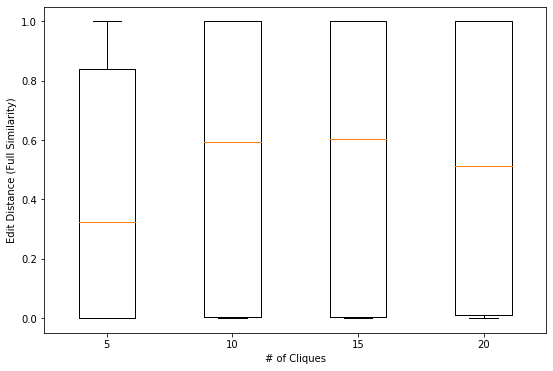

In [66]:
# box plot to compare full sim vals against num of cliques
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

full_sims = collections.OrderedDict(sorted(full_sims.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(full_sims.values()))

ax2.set_xlabel('# of Cliques')
ax2.set_ylabel('Edit Distance (Full Similarity)')
plt.xticks([x for x in range(1, len(list(full_sims.keys())) + 1)], list(full_sims.keys()))

Jaccard Index

([<matplotlib.axis.XTick at 0x28caba3de48>,
 <a list of 4 Text xticklabel objects>)

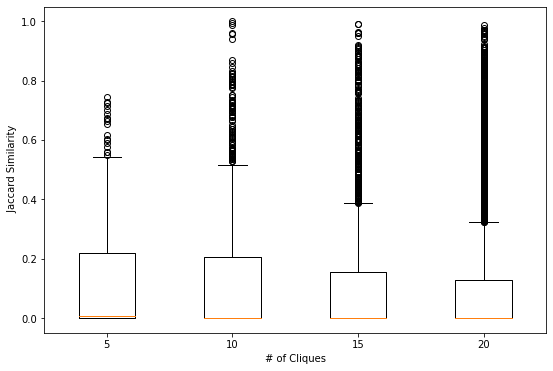

In [68]:
# box plot to compare jaccard sim against num of cliques
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

jaccard_index = collections.OrderedDict(sorted(jaccard_index.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(jaccard_index.values()))

ax2.set_xlabel('# of Cliques')
ax2.set_ylabel(' Jaccard Similarity')
plt.xticks([x for x in range(1, len(list(jaccard_index.keys())) + 1)], list(jaccard_index.keys()))